In [64]:
#******************************************************
# Name: Jonah Zembower
# Date: 08/20/2024
# This code is to analyze the spreadsheet 
# data collected from baseline measurements 
# both at the beginning and end of the spring semester.
#******************************************************

In [65]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Body Composition Data

In [66]:
# load the excel file
file_path = ['/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Baseline Measurements/Fall 2024/Fall 2024 Baseline Measurements Beginning of Semester.xlsx']

# read the excel file into a dataframe
beginning_df = pd.read_excel(file_path[0])

# display the first 5 rows of each dataframe
beginning_df.head()

,Monitor Number,Subject,Height,Age,Weight (lbs),Fat%,Fat Mass (lbs),FFM (lbs),Muscle Mass (lbs),TBW (lbs),TBW%,Bone Mass (lbs),BMR (kcal),Metabolic Age,Visceral Fat rating,BMI,Unnamed: 16
0,1.0,Anthony Panko,6'0,22.0,184.8,16.0,29.6,155.2,147.6,106.6,57.7,7.6,2090.0,17.0,3.0,25.1,NaN
1,2.0,Esteban Moreira,6'3,19.0,195.6,14.2,27.8,167.8,159.6,113.8,58.2,8.2,2279.0,12.0,2.0,24.4,NaN
2,3.0,Jack Scanlon,5'11,18.0,151.6,11.5,17.4,134.2,127.4,93.0,61.3,6.8,1817.0,12.0,1.0,21.1,NaN
3,4.0,Lucas Balderrama,5'10,22.0,159.6,13.2,21.0,138.6,131.6,97.0,60.8,7.0,1854.0,12.0,1.0,22.9,NaN
4,5.0,Ron Klinger,6'3,20.0,195.4,14.4,28.2,167.2,159.0,113.2,57.9,8.2,2265.0,12.0,2.0,24.4,NaN


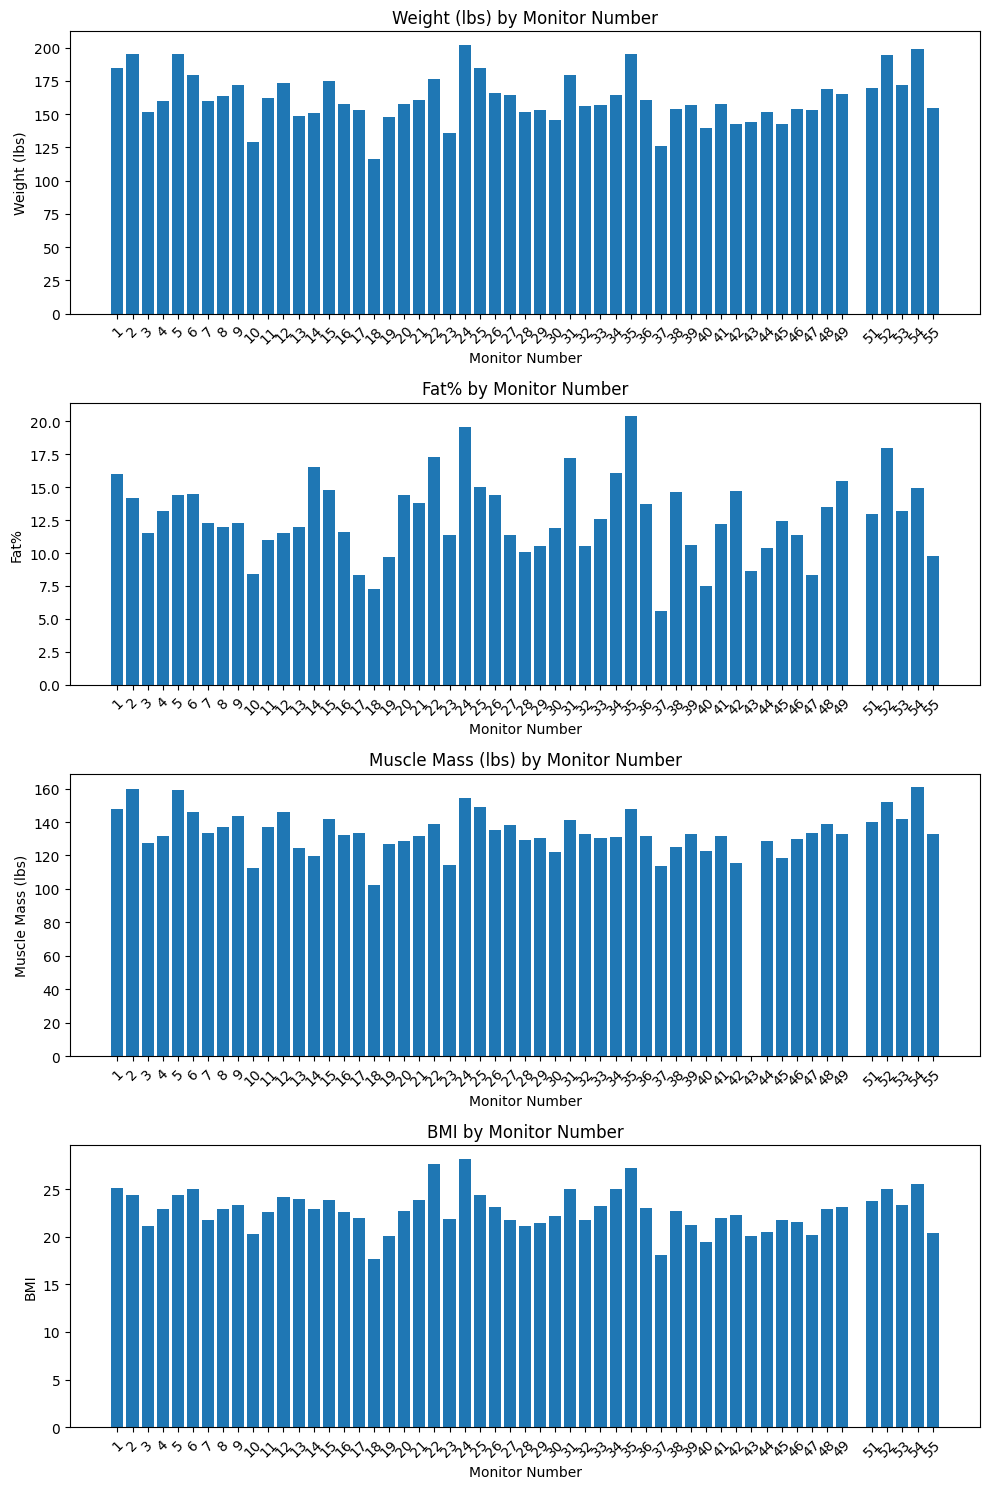

In [67]:
# It seems that there may be missing or non-numeric values in the 'Monitor Number' column. 
# I'll handle this by ensuring that the 'Monitor Number' column contains only valid integers for the x-axis labels.

# Drop any rows with missing 'Monitor Number' values and ensure it's an integer
df_clean = beginning_df.dropna(subset=['Monitor Number']).copy()
df_clean['Monitor Number'] = df_clean['Monitor Number'].astype(int)

# Define the metrics to be plotted
metrics = ['Weight (lbs)', 'Fat%', 'Muscle Mass (lbs)', 'BMI']

# Replot with monitor numbers displayed individually on the x-axis
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

for i, metric in enumerate(metrics):
    axs[i].bar(df_clean['Monitor Number'], df_clean[metric])
    axs[i].set_title(f'{metric} by Monitor Number')
    axs[i].set_xlabel('Monitor Number')
    axs[i].set_ylabel(metric)
    axs[i].set_xticks(df_clean['Monitor Number'])
    axs[i].set_xticklabels(df_clean['Monitor Number'], rotation=45)

plt.tight_layout()
plt.show()


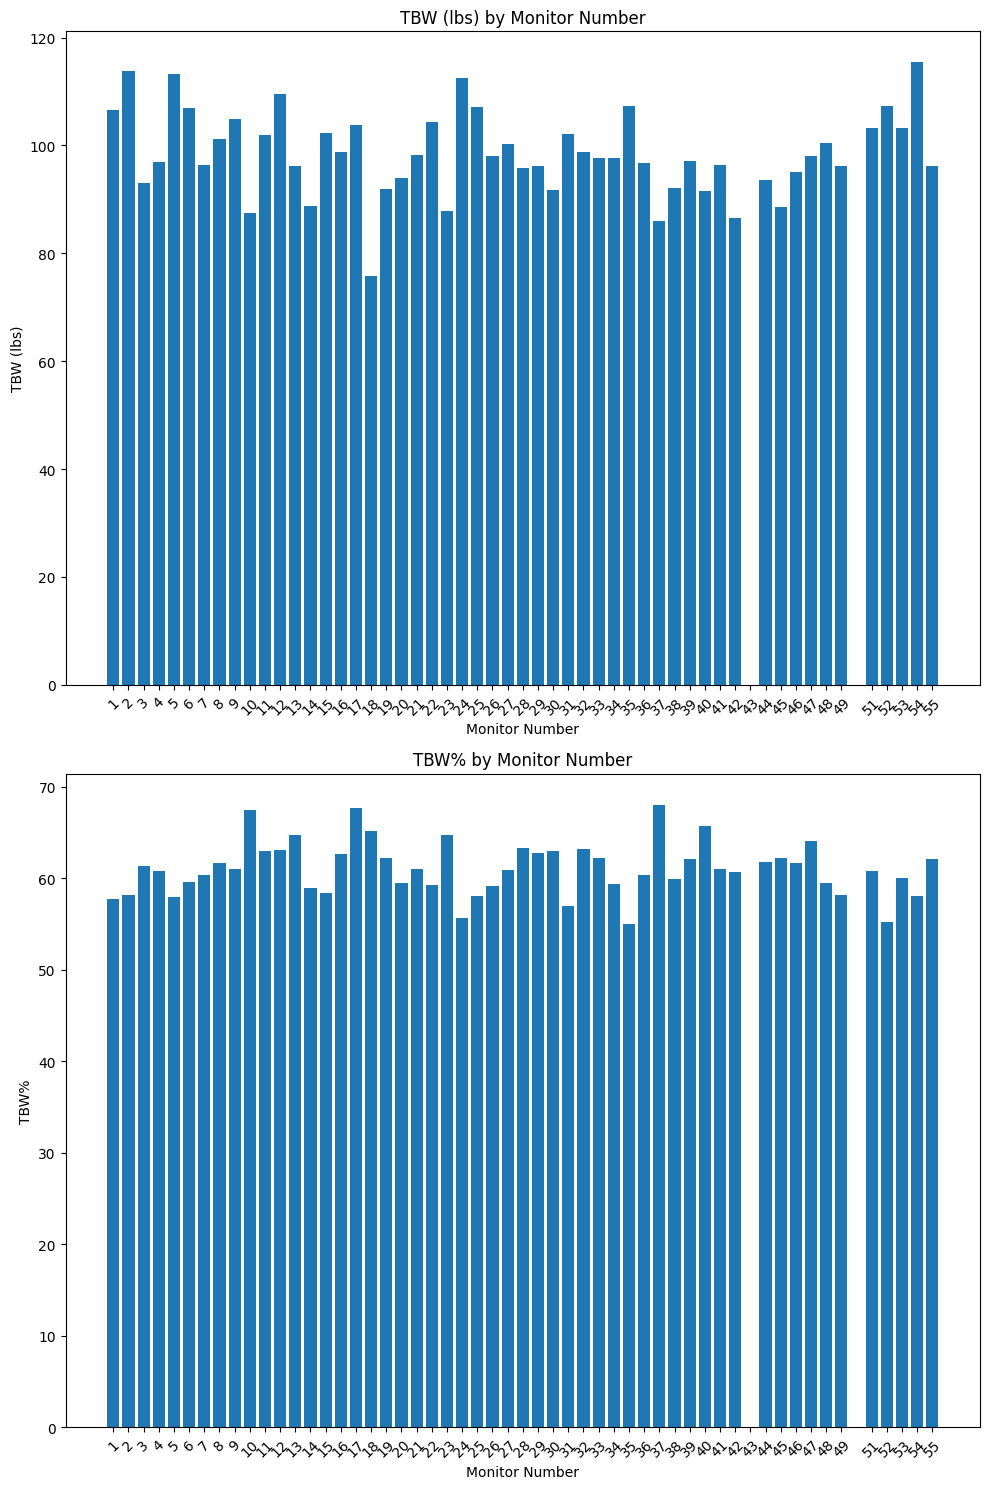

In [68]:
# List of hydration metrics
hydration_metrics = ['TBW (lbs)', 'TBW%']

# Replot with monitor numbers displayed individually on the x-axis
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

for i, metric in enumerate(hydration_metrics):
    axs[i].bar(df_clean['Monitor Number'], df_clean[metric])
    axs[i].set_title(f'{metric} by Monitor Number')
    axs[i].set_xlabel('Monitor Number')
    axs[i].set_ylabel(metric)
    axs[i].set_xticks(df_clean['Monitor Number'])
    axs[i].set_xticklabels(df_clean['Monitor Number'], rotation=45)

plt.tight_layout()
plt.show()


# Sit and Reach Data

In [73]:
# Load the file path as a string instead of a list now
file_path = '/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Baseline Measurements/Fall 2024/Fall 2024 Baseline Measurements Beginning of Semester.xlsx'

# Load the 'Sit and Reach' sheet from the Excel file
sit_and_reach_df = pd.read_excel(file_path, sheet_name='Sit and Reach Test (081924)')

# Display the first few rows to understand its structure
sit_and_reach_df.head()


,Monitor Number,Subject,Sit & Reach (cm)
0,1.0,Anthony Panko,42.0
1,2.0,Esteban Moreira,16.0
2,3.0,Jack Scanlon,31.0
3,4.0,Lucas Balderrama,38.0
4,5.0,Ron Klinger,28.5


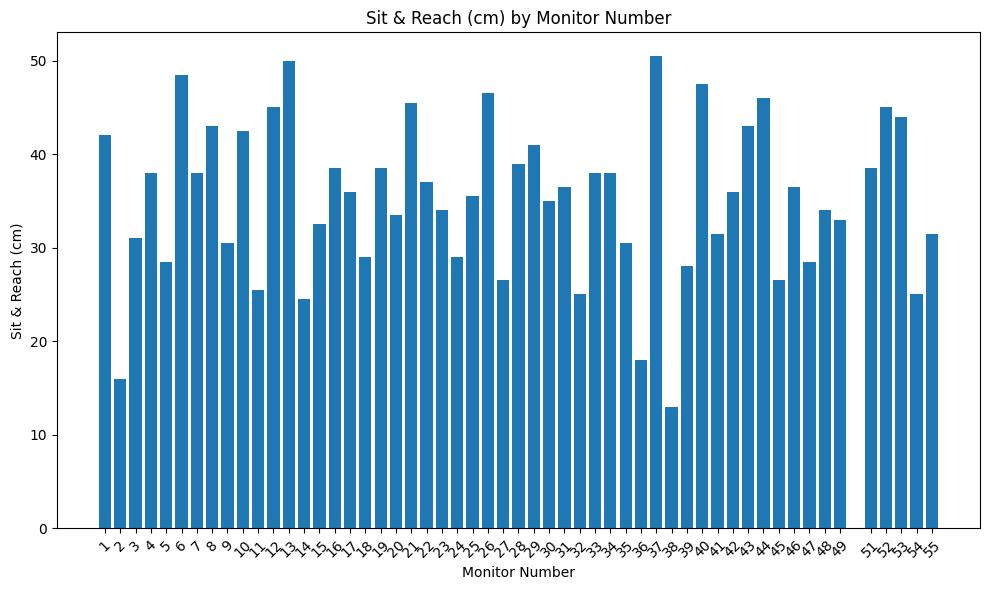

In [74]:
# Clean the data by dropping any rows with NaN in 'Monitor Number'
sit_and_reach_df_clean = sit_and_reach_df.dropna(subset=['Monitor Number']).copy()

# Convert 'Monitor Number' to int to avoid casting issues
sit_and_reach_df_clean['Monitor Number'] = sit_and_reach_df_clean['Monitor Number'].astype(int)

# Create the bar chart again
plt.figure(figsize=(10, 6))
plt.bar(sit_and_reach_df_clean['Monitor Number'], sit_and_reach_df_clean['Sit & Reach (cm)'])
plt.title('Sit & Reach (cm) by Monitor Number')
plt.xlabel('Monitor Number')
plt.ylabel('Sit & Reach (cm)')
plt.xticks(sit_and_reach_df_clean['Monitor Number'], rotation=45)
plt.tight_layout()
plt.show()


# 1.5 Mile Run Data

In [75]:
# Load the 1.5 Mile Run Test data from the specific sheet
file_path = '/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Majors/Heart Rate Monitor Research/Data Analysis/Baseline Measurements/Fall 2024/Fall 2024 Baseline Measurements Beginning of Semester.xlsx'  # Replace with your file path
beginning_run_df = pd.read_excel(file_path, sheet_name='1.5 Mile Run Test (081924)')

# Display the first few rows to understand its structure
beginning_run_df.head()


,Monitor Number,Subject,Time (Minutes),VO2 Max,Unnamed: 4,8 laps to get to 1.5 miles in yards around the field. Using the 6 as the height.
0,1.0,Anthony Panko,10:10.00,NaN,NaN,NaN
1,2.0,Esteban Moreira,NaN,NaN,NaN,NaN
2,3.0,Jack Scanlon,NaN,NaN,NaN,NaN
3,4.0,Lucas Balderrama,9:14.00,NaN,NaN,NaN
4,5.0,Ron Klinger,9:27.00,NaN,NaN,NaN


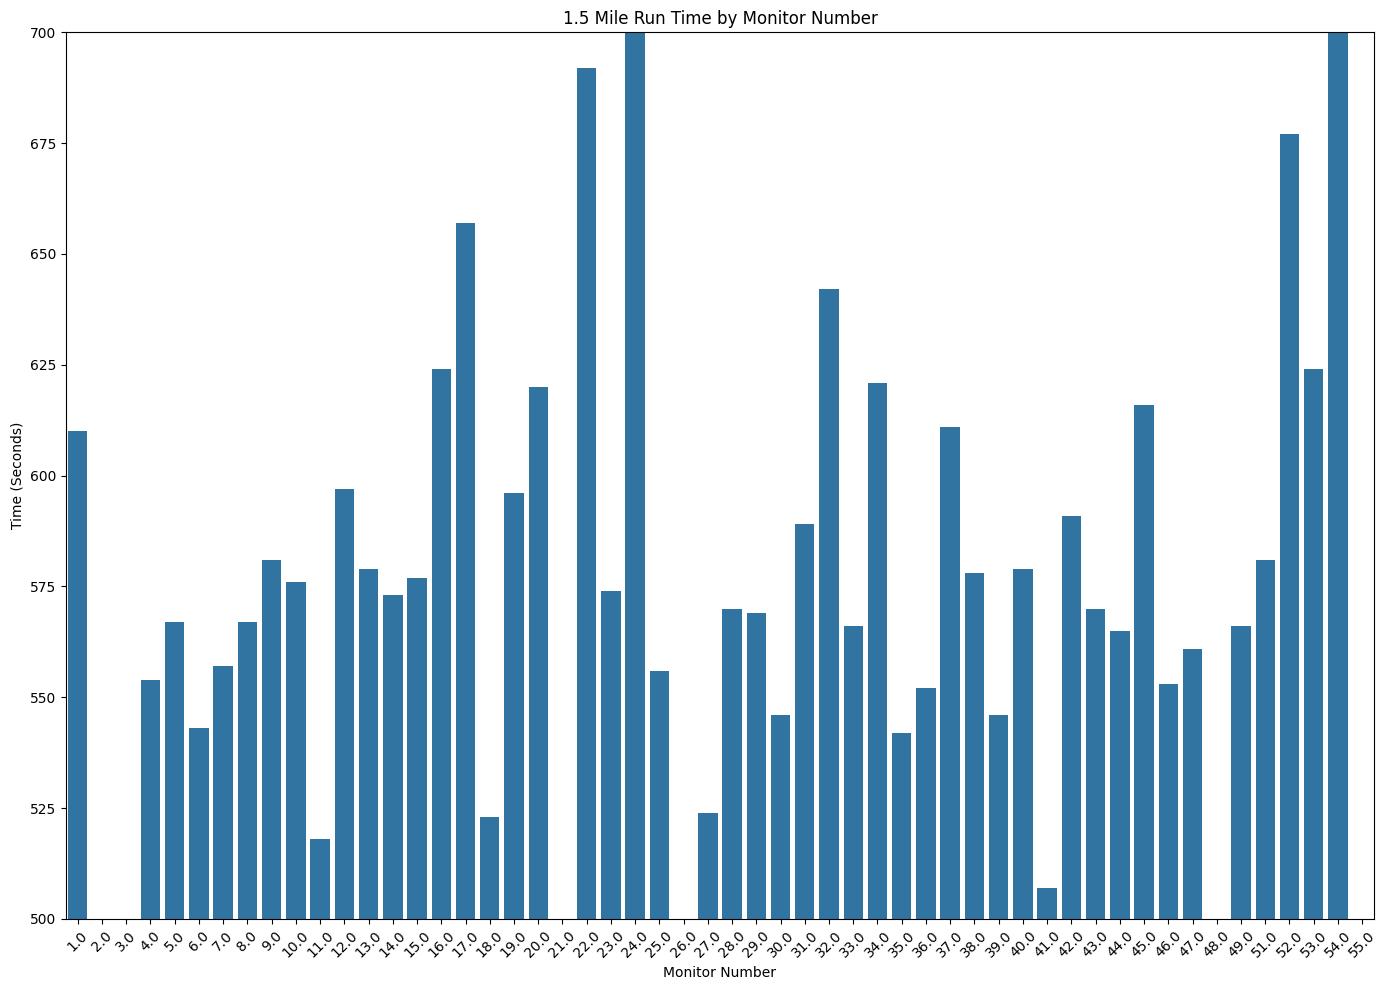

In [76]:
# Function to convert time format to total seconds
def convert_time_to_seconds(time_str):
    if pd.isnull(time_str):
        return None
    minutes, seconds = map(float, time_str.split(':'))
    return minutes * 60 + seconds

# Apply the conversion function to the time columns
beginning_run_df['Time_seconds'] = beginning_run_df['Time (Minutes)'].apply(convert_time_to_seconds)

# Create a bar plot to show time in seconds based on the monitor number
plt.figure(figsize=(14, 10))
sns.barplot(data=beginning_run_df, x='Monitor Number', y='Time_seconds')
plt.title('1.5 Mile Run Time by Monitor Number')
plt.xlabel('Monitor Number')
plt.ylabel('Time (Seconds)')
plt.ylim(500, 700)  # Adjust this range based on expected times
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [78]:
# Function to convert seconds back to time format
def convert_seconds_to_time(seconds):
    if pd.isnull(seconds):
        return None
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f'{minutes}:{seconds:02}'

# Convert run times back to minutes:seconds format
beginning_run_df['Run Time (minutes:seconds)'] = beginning_run_df['Time_seconds'].apply(convert_seconds_to_time)

# Normative data provided
normative_data = {
    'Age_Group': ['20-29', '30-39', '40-49', '50-59', '60-69'],
    '90th_Percentile': [574, 592, 609, 669, 730],  # Values in seconds
    '80th_Percentile': [608, 622, 665, 734, 808],
    '70th_Percentile': [649, 677, 712, 786, 891],
    '60th_Percentile': [687, 731, 735, 833, 969],
    '50th_Percentile': [718, 745, 785, 881, 1048],
    '40th_Percentile': [749, 773, 830, 915, 1127],
    '30th_Percentile': [788, 828, 873, 975, 1214],
    '20th_Percentile': [838, 860, 918, 1050, 1435],
    '10th_Percentile': [910, 1020, 1024, 1312, 1592],
}

norm_df = pd.DataFrame(normative_data)

# Function to find percentile rank
def find_percentile(time, age_group):
    percentiles = norm_df[norm_df['Age_Group'] == age_group]
    for col in percentiles.columns[1:]:
        if time <= percentiles[col].values[0]:
            return col.split('_')[0] + 'th'
    return 'N/A'

# Assuming age group is '20-29' for all (adjust as needed)
beginning_run_df['Age_Group'] = '20-29'

# Find percentile rank for each participant
beginning_run_df['Percentile_Rank'] = beginning_run_df.apply(
    lambda row: find_percentile(row['Time_seconds'], row['Age_Group']), axis=1
)

# Create a summary table
summary_table = beginning_run_df[['Monitor Number', 'Subject', 'Run Time (minutes:seconds)', 'Percentile_Rank']]
summary_table.columns = ['Monitor Number', 'Subject', 'Run Time (minutes:seconds)', 'Percentile Rank']

# Display the full summary table using the pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the summary table fully
summary_table



,Monitor Number,Subject,Run Time (minutes:seconds),Percentile Rank
0,1.0,Anthony Panko,10:10,70thth
1,2.0,Esteban Moreira,None,N/A
2,3.0,Jack Scanlon,None,N/A
3,4.0,Lucas Balderrama,9:14,90thth
4,5.0,Ron Klinger,9:27,90thth
5,6.0,Stanislav Chernyshov,9:03,90thth
6,7.0,Tate Hywood,9:17,90thth
7,8.0,Will Manning,9:27,90thth
8,NaN,NaN,None,N/A
9,9.0,Alec Griswold,9:41,80thth


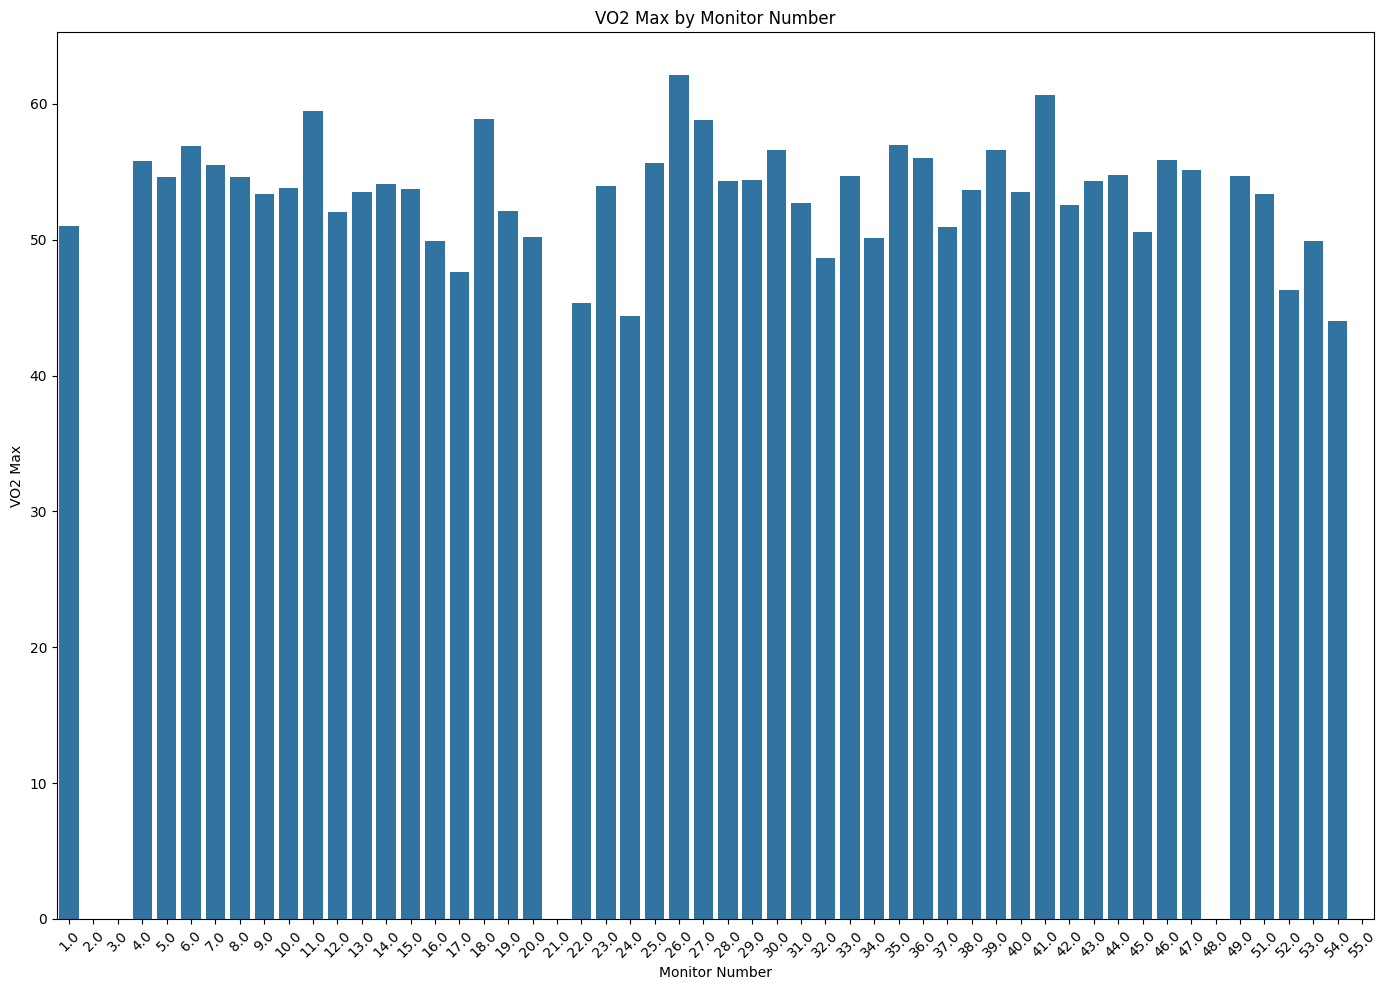

In [79]:
# Calculate VO2 Max using the Cooper equation for the beginning run
beginning_run_df['VO2_Max'] = 3.5 + (483 / (beginning_run_df['Time_seconds'] / 60))

# Create a bar plot to show VO2 Max based on the monitor number
plt.figure(figsize=(14, 10))
sns.barplot(data=beginning_run_df, x='Monitor Number', y='VO2_Max')
plt.title('VO2 Max by Monitor Number')
plt.xlabel('Monitor Number')
plt.ylabel('VO2 Max')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [80]:
# Create a summary table including VO2 Max
summary_table = beginning_run_df[['Monitor Number', 'Subject', 'Run Time (minutes:seconds)', 'Percentile_Rank', 'VO2_Max']]
summary_table.columns = ['Monitor Number', 'Subject', 'Run Time (minutes:seconds)', 'Percentile Rank', 'VO2 Max']

# Display the summary table
summary_table


,Monitor Number,Subject,Run Time (minutes:seconds),Percentile Rank,VO2 Max
0,1.0,Anthony Panko,10:10,70thth,51.008197
1,2.0,Esteban Moreira,None,N/A,NaN
2,3.0,Jack Scanlon,None,N/A,NaN
3,4.0,Lucas Balderrama,9:14,90thth,55.810469
4,5.0,Ron Klinger,9:27,90thth,54.611111
5,6.0,Stanislav Chernyshov,9:03,90thth,56.870166
6,7.0,Tate Hywood,9:17,90thth,55.528725
7,8.0,Will Manning,9:27,90thth,54.611111
8,NaN,NaN,None,N/A,NaN
9,9.0,Alec Griswold,9:41,80thth,53.379518
